<a href="https://colab.research.google.com/github/breshmashri/Project-113-Data-Story-2/blob/main/Project_113_Data_Story_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the important modules

In [2]:
import statistics
import pandas as pd
import plotly.express as px

In [3]:
 #Uploading the csv
 from google.colab import files
 data_to_load = files.upload()

Saving savings_data.csv to savings_data.csv


In [4]:
#Plotting the graph
df = pd.read_csv("savings_data.csv")
fig = px.scatter(df, y = "quant_saved", color = "highschool_completed")
fig.show()

In [5]:
#Finding the mean, median and mode of the big data
df = pd.read_csv('savings_data.csv')
data = df["quant_saved"].tolist()

mean = statistics.mean(data)
median = statistics.median(data)
mode = statistics.mode(data)

print("Mean of data is :- ", mean)
print("Medium of data is :-", median)
print("Mode of data is :-", mode)

Mean of data is :-  85.32780331328739
Medium of data is :- 39.2724
Mode of data is :- 0.0


In [6]:
import csv

with open ("savings_data.csv",newline="") as f:
  reader=csv.reader(f)
  savings_data=list(reader)

In [7]:
#Finding correlation 
import numpy as np

age = []
savings = []

for data in savings_data:
  if data[1] != 0:
    age.append(data[1])
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0, 2]}")

ValueError: ignored

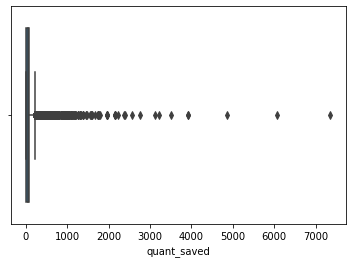

In [8]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

In [9]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3 - q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [12]:
#Mean, median and mode of savings
import plotly.figure_factory as ff

all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


In [13]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random
import plotly.graph_objects as go

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [14]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 5.18537826271615


In [15]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.200519389818794
Mean of Sampling Distribution - 46.3673572051595


In [17]:
#temp_df will have the rows where wealthy is not 0
temp_df = new_df[new_df.wealthy != 0]

wealthy = temp_df["wealthy"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(wealthy, savings)
print(f"Correlation between the wealthy of the person and their savings is - {correlation[0,1]}")

Correlation between the wealthy of the person and their savings is - nan


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



In [18]:
reminded_df = new_df.loc[new_df["wealthy"] == 1]
not_reminded_df = new_df.loc[new_df["wealthy"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
14    78.544800       1                     1        0
15    46.152332       1                     1        0
21     2.284000       1                     1        0


In [19]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Savings (Not Reminded)"], show_hist=False)
fig.show()

In [20]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Reminded) -> 45.3789307409242
Standard Deviation of Sampling (Not Reminded) -> 5.110925705803166


In [21]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 40.26800503512103 and First (end) - 50.489856446727366
Second (start) - 35.15707932931787 and Second (end) - 55.60078215253053
Third (start) - 30.046153623514698 and Third (end) - 60.711707858333696


In [22]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Reminded) -> 48.40443372729301
Standard Deviation of Sampling (Reminded) -> 4.944495072633357


In [23]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - 0.5919677100634679
